In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import  Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
import keras
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as pip
from sklearn.impute import SimpleImputer

In [2]:
mic_df=pd.read_csv("C:\\BIG DATA\\thesis\\12045261\\Myocardial infarction complications Database.csv")
mic_df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


60.85573539760732
67.1070110701107


count    1692.000000
mean       61.856974
std        11.259936
min        26.000000
25%        54.000000
50%        63.000000
75%        70.000000
max        92.000000
Name: AGE, dtype: float64

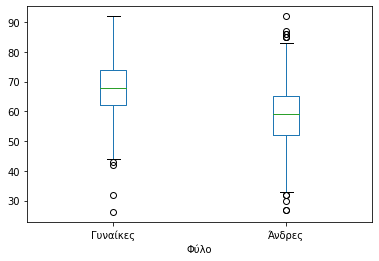

In [3]:
#BOXPLOT=ΘΗΚΟΓΡΑΜΜΑ
print(mic_df.loc[(mic_df["LET_IS"]==0),"AGE"].mean())
print(mic_df.loc[(mic_df["LET_IS"]!=0),"AGE"].mean())
#mic_df.groupby('SEX')["AGE"].mean().plot.bar(xlabel="Φύλο",color=["pink","cyan"]).set_xticklabels(['Γυναίκες','Άνδρες'],rotation=0)
mic_df.boxplot(column=['AGE'],by="SEX",grid=False).set_xticklabels(['Γυναίκες','Άνδρες'])#ΗΛΙΚΙΑΚΗ ΚΑΤΑΝΟΜΗ DATASET ANA ΦΥΛΟ
plt.title('')
plt.suptitle('')
plt.xlabel('Φύλο')
mic_df["AGE"].describe()

EDA

67.1070110701107
SEX
0    67.597156
1    58.425873
Name: AGE, dtype: float64


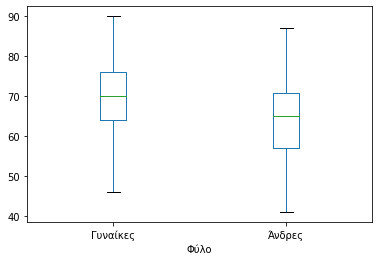

In [8]:
#MESH HLIKIA THANONTWN, MESH HLIKIA THANONTWN ANA FYLO
print(mic_df.loc[mic_df.LET_IS!=0,"AGE"].mean())#MESH HLIKIA THANONTWN
mic_df.loc[mic_df.LET_IS!=0].boxplot(column=['AGE'],by="SEX",grid=False).set_xticklabels(['Γυναίκες','Άνδρες'])#BOXPLOT THANONTWN ANA FYLO
plt.title('')
plt.suptitle('')
plt.xlabel('Φύλο')
print(mic_df.groupby('SEX')["AGE"].mean())

<AxesSubplot:xlabel='index'>

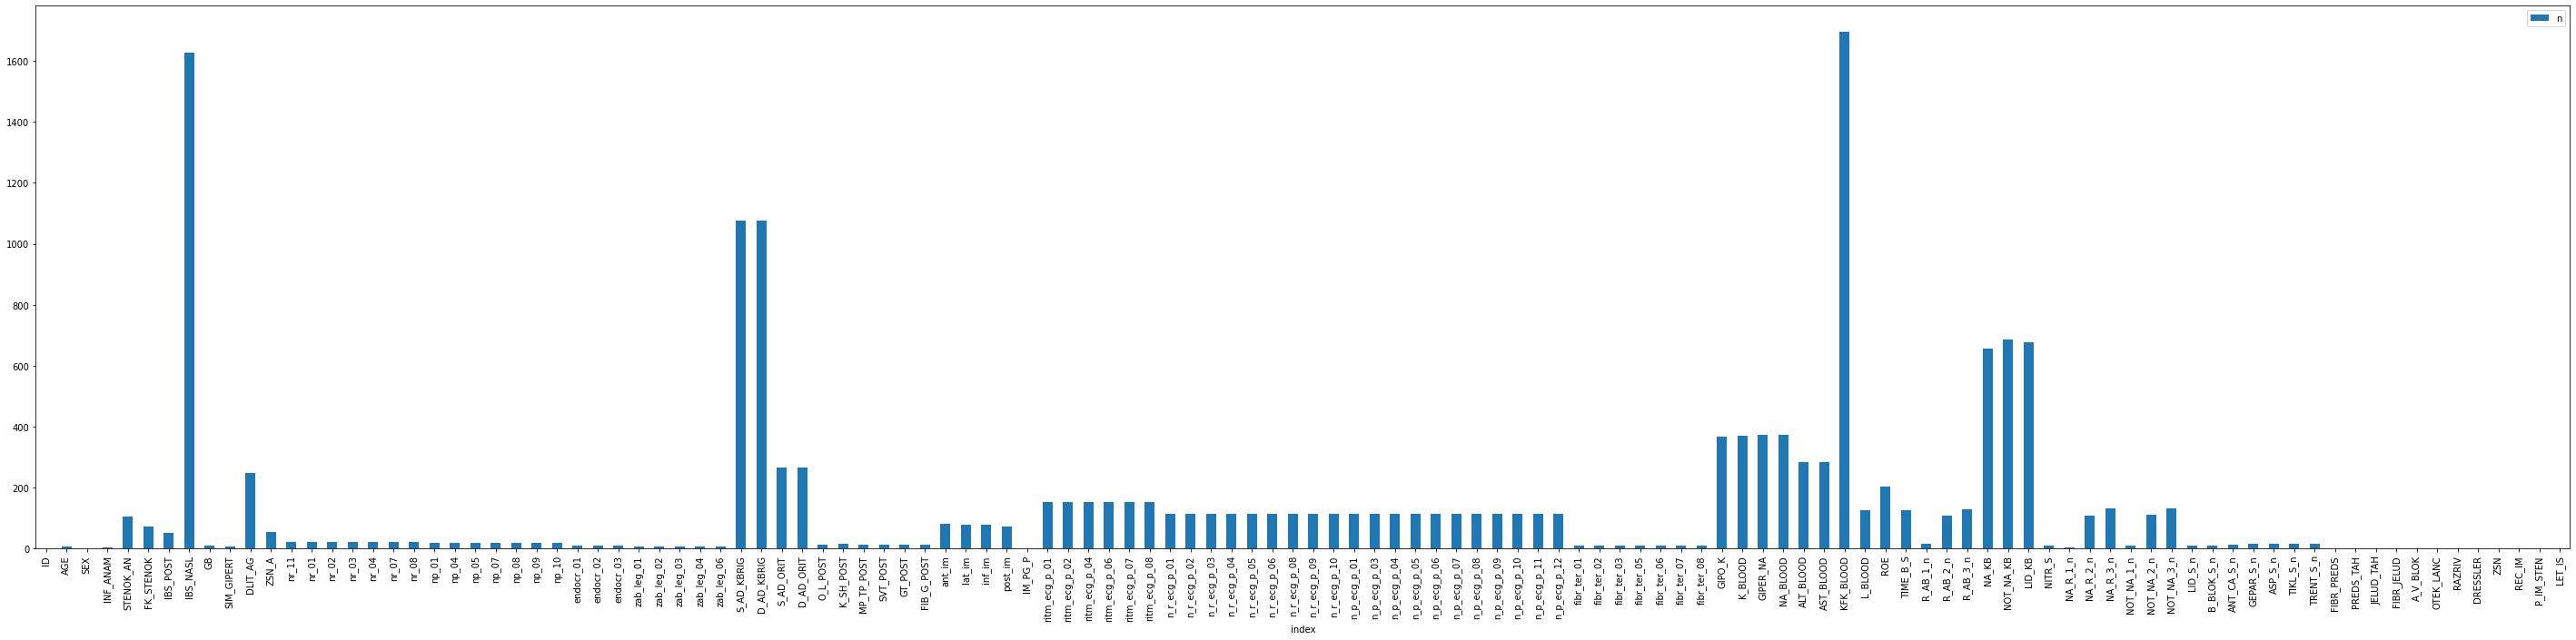

In [5]:

mic_df.isna().sum()
mic_df.isna().sum().reset_index(name='n').plot.bar(x='index',y='n',rot=90,figsize=(50,11))



## Handling Missing Values

In [6]:
#Οι στηλες IBS_NASL, KFK_BLOOD,ΚΑΘΩΣ ΚΑΙ ΟΙ ,S_AD_KBRIG,D_AD_KBRIG αποτελουνται σχεδον αποκλειστικα απο missing values και γινονται drop. Drop kanoume episis kai to id
mic_df.drop(["ID","IBS_NASL","KFK_BLOOD","S_AD_KBRIG","D_AD_KBRIG"],inplace=True,axis=1)
#mic_df.drop(["ID","IBS_NASL","KFK_BLOOD"],inplace=True,axis=1)

lst=["AGE","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","L_BLOOD","ROE"]
for col in lst:
        print(col)
        print(mic_df.loc[(mic_df["LET_IS"]==0),col].mean())
        print(mic_df.loc[(mic_df["LET_IS"]!=0),col].mean())
        
#ΦΤΙΑΞΕ PLOTS ΓΙΑ τα πιο ενδιαφεροντα απο ΑΥΤΑ !!!!!!!!!!!!!!!!!! ΚΩΔΙΚΑΣ ΕΤΟΙΜΟΣ ΠΑΡΑΠΑΝΩ ΓΙΑ ΤΟ AGE, Για το death (LET_IS!=0) φτιαξτο παρακατω που κανεις το let_is να παιρνει 2 τιμες

AGE
60.85573539760732
67.1070110701107
S_AD_ORIT
138.34476843910807
118.18352059925094
D_AD_ORIT
85.18010291595198
72.13483146067416
K_BLOOD
4.188147497805092
4.211052631578947
NA_BLOOD
136.60616740088105
136.22105263157894
ALT_BLOOD
0.4833472106577852
0.4708837209302326
AST_BLOOD
0.2608666666666667
0.27962790697674417
L_BLOOD
8.542246108228317
10.219469026548675
ROE
12.970519782777346
16.384615384615383


In [7]:
#Αντικατασταση missing values με τον ιδιο τροπο με τον απο κατω αλλα μεσω ColumnTransformer προκειμενου να χρησιμοποιηθει μετα σε αλλο pipeline μαζι με cross validation Και να ναι 
#απολυτα σωστο χωρις ιχνος data leakage
#Aν θες να βαλεις και scaler τοτε η απο κατω γραμμη θα γινει ως εξης:numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])
numeric_transformer = SimpleImputer(strategy="mean")

l1=mic_df.columns.values.tolist()#Παιρνω τα ονοματα ολων των στηλων σε λιστα
categorical_features = [x for x in l1 if x not in lst]#Απο την παραπανω λιστα αφαιρω τα ονοματα ΤΩΝ CATEGORICAL FEATURES
categorical_transformer = pip.Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, lst),
        ("cat", categorical_transformer, categorical_features),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

SyntaxError: invalid syntax (Temp/ipykernel_6276/2356350834.py, line 10)

In [ ]:
#Αντικατασταση missing values με mean στηλης για στηλες με συνεχεις τιμες
for col in lst:
        mic_df[col].fillna(value=mic_df[col].mean(),inplace=True)
#Αντικατασταση missing values με most common value (=mode) για τις υπολοιπες στηλες
df2=mic_df.fillna(mic_df.mode().iloc[0])
df2

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,1,0,0,0,0,0,1


61.85697399527187
1    1065
0     635
Name: SEX, dtype: int64


Text(0.5, 1.0, 'Κατανομή παρατηρήσεων κατά φύλο')

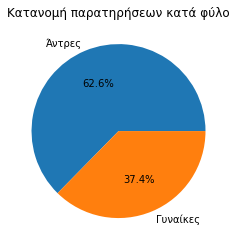

In [ ]:
print(mic_df["AGE"].mean())
print(mic_df["SEX"].value_counts())
plt.pie(mic_df["SEX"].value_counts(),labels=["Άντρες","Γυναίκες"], autopct='%1.1f%%')
plt.title('Κατανομή παρατηρήσεων κατά φύλο')

In [ ]:
target_variable="LET_IS"
scenario=5
to_drop_list3=["R_AB_3_n","NA_R_3_n","NOT_NA_3_n"]
to_drop_list2=["R_AB_2_n","NA_R_2_n","NOT_NA_2_n"]
to_drop_list1=["R_AB_1_n","NA_R_1_n","NOT_NA_1_n"]
to_drop_list2.extend(to_drop_list3)
to_drop_list1.extend(to_drop_list2)


In [ ]:
df2.loc[df2.LET_IS!=0,'LET_IS']=1 #To LET_IS einai multiclass. Ayti i grammi to kanei binary 0=zisane. 1=pethanane
y=df2[target_variable]
if scenario==5:
    x = df2.drop([target_variable], axis=1)
elif scenario==4:
    x = df2.loc[: ,"AGE":"TRENT_S_n"]
elif scenario==3:
    df3 = df2.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list3, axis=1)
elif scenario==2:
    df3 =  df2.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list2, axis=1)
elif scenario==1:
    df3 = df2.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list1, axis=1)
x


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,1,0,1,0,0,0,0
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,1,0,0,0,0,0


#DROP COLUMNS WHICH CONTAIN THE SAME VALUE OVER 95% OF TIME

In [ ]:
'''lst2=[]
#df3 = df2.loc[: ,"AGE":"TRENT_S_n"]
#if scenario!=5
for column in x:
    if len(x[column].unique())==2:
        if x[column].value_counts().iloc[0]>len(x.index)*0.95 or x[column].value_counts().iloc[0]<len(x.index)*0.05:
            #print(df2[column].value_counts())
            lst2.append(column)
#print(lst2)     
x=x.drop(lst2, axis=1)
print(len(lst2))      
#print(x.shape)'''
'''2ος τροπος
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x)'''


array([[77.,  1.,  2., ...,  0.,  0.,  0.],
       [55.,  1.,  1., ...,  0.,  0.,  0.],
       [52.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [55.,  1.,  3., ...,  0.,  1.,  0.],
       [79.,  0.,  2., ...,  0.,  0.,  0.],
       [63.,  1.,  2., ...,  0.,  0.,  0.]])

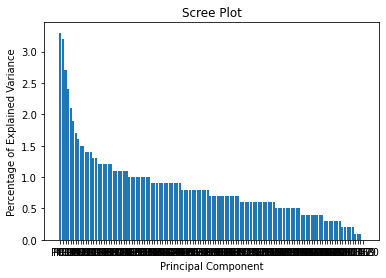

Text(0, 0.5, 'Cumulative Explained Variance')

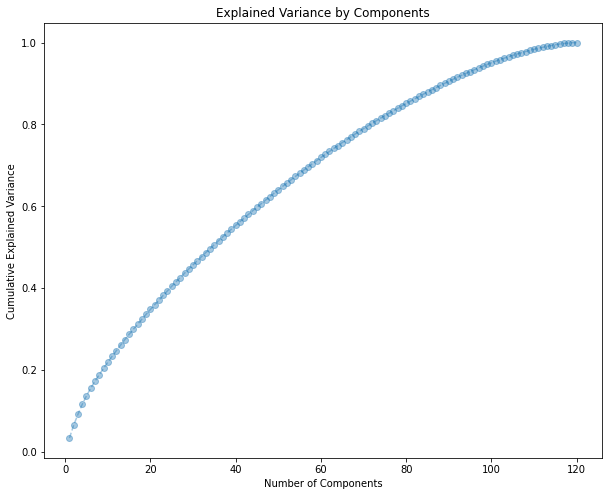

In [ ]:
#YPODEIGMA KWDIKA PROKEIMENOY NA DW TI GINETAI GENIKA ME PCA. AFOY DW APO DW TI GINETAI GENIKA, PAW META KAI TIN EFARMOZW DIALEGONTAS POSA PRINCIPAL COMPONENTS THELW.
#AYTOS O KWDIKAS ME EKSAIRESI TIN PRWTI GRAMMI EINAI IDIOS GIA KATHE FORA POY THELW NA EFARMOSW PCA
#(EFARMOGI STO PARAKATW KELI)
scaled_data = preprocessing.scale(x) #PCA EFARMOZW PANTA SE NORMALIZED DATASET. NORMALIZED KAI OXI STANDARDIZED!
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data)


#Ο παρακατω κωδικα μας δινει barchart με το ποσοστο διακυμανσης ανα principal component 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


#Ο παρακατω κωδικα μας δινει αθροιστικη διακυμανση ανα πληθος principal components
plt.figure( figsize = (10,8))
plt.plot(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', alpha=0.4)
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

Correlations

In [ ]:
#EFARMOGI THS PCA!!!
pca = PCA(n_components=35)
X = pca.fit_transform(scaled_data)#PCA EFARMOZOYME SE OLO TO DATASET EKTOS APO TO TARGET VARIABLE!

In [ ]:
cor=df2.corr()
cor_target = abs(cor[target_variable])
relevant_features = cor_target[cor_target>0.5]
relevant_features
#No high correlation between features and target variable

LET_IS    1.0
Name: LET_IS, dtype: float64

target variable examination

0    1429
1     271
Name: LET_IS, dtype: int64


Text(0.5, 1.0, 'Κατανομή θανάτων')

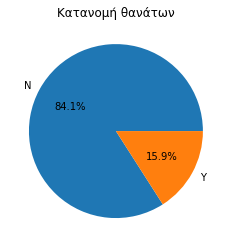

In [ ]:
print(df2[target_variable].value_counts())
#class is imbalanced!!!
plt.pie(df2["LET_IS"].value_counts(),labels=["N","Y"], autopct='%1.1f%%')
plt.title('Κατανομή θανάτων')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
X_train_norm=X_train.copy()
X_test_norm=X_test.copy()
for c in lst:
    norm=MinMaxScaler().fit(X_train_norm[[c]])    
    X_train_norm[c]=norm.transform(X_train_norm[[c]])
    X_test_norm[c]=norm.transform(X_test_norm[[c]])
#X_train_norm["AGE"]    

In [ ]:
fs = SelectKBest(k=30)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)


C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear',C=0.1,probability=True)
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=7,random_state=1234,max_leaf_nodes=5)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,max_iter=10000,C=0.25)
    },
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(n_neighbors=12,weights='distance',algorithm='brute')
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=300, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=200, learning_rate=1, random_state=1234)
    },
    {
        "name": "XGboost",
        "classifier": XGBClassifier(scale_pos_weight=10,use_label_encoder=False)
    },
    {
        "name": "LDA",
        "classifier": LinearDiscriminantAnalysis()
    }
    ] 

classification report for SVM

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       286
           1       0.76      0.46      0.57        54

    accuracy                           0.89       340
   macro avg       0.83      0.72      0.76       340
weighted avg       0.88      0.89      0.88       340

AUC=0.703
classification report for Random Forest

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       286
           1       0.74      0.57      0.65        54

    accuracy                           0.90       340
   macro avg       0.83      0.77      0.79       340
weighted avg       0.89      0.90      0.89       340

AUC=0.749
classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       286
           1       0.94      0.31      0.47        54

    accuracy                           0.89      

C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


classification report for AdaBoost

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       286
           1       0.70      0.65      0.67        54

    accuracy                           0.90       340
   macro avg       0.82      0.80      0.81       340
weighted avg       0.90      0.90      0.90       340

AUC=0.723
classification report for Gradient Boosting

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       286
           1       0.63      0.67      0.65        54

    accuracy                           0.89       340
   macro avg       0.78      0.80      0.79       340
weighted avg       0.89      0.89      0.89       340

AUC=0.700
[19:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

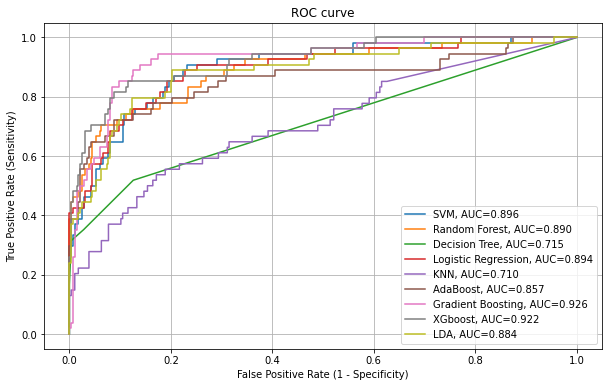

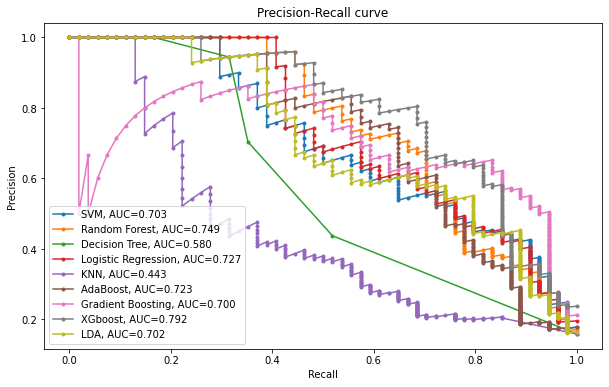

In [ ]:
#Object oriented tropos gia na ftiakseis plot. Den einai kamia filisofia. Oi 2 parakatw grammes einai auto pou ginetai sto background otan les plt.plot
#Diladi arxika dimioyrgeitai ena object tupou figure kai meta tou dinontai diastaseis(Tis pairnei default an den tis orisoume). O katwthi sxoliasmenos kwdika kanei akrivws 
#ta idia pramata
'''plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)'''
fig = plt.figure(figsize=(10,6))  # a new figure window
ax = fig.add_subplot(1, 1, 1)
ax.set_title('ROC curve')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity)')
ax.grid(True)


fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title('Precision-Recall curve')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')


for c in classifiers:
    clf=c["classifier"]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true=y_test
    print("classification report for {}\n".format(c["name"]))
    print(classification_report(y_test,y_pred))

    yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
    yhat = yhat[:, 1]

#plot roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
    ax.plot(fpr, tpr,label=c["name"]+", AUC=%.3f" % auc(fpr, tpr))
    ax.legend()

#plot precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, yhat)
    ax2.plot(recall, precision, marker='.', label=c["name"]+", AUC=%.3f" % auc(recall, precision))
    ax2.legend()

#finally print Area Under the Curve of each precision-recall curve
    print("AUC=%.3f" % auc(recall, precision))        

In [ ]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
model = RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    
model.fit(X_train, y_train)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)    
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-measure=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.490, F-measure=0.71429


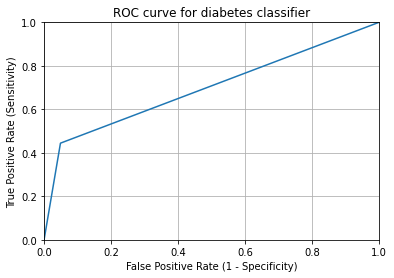

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

GRID SEARCH -CLASS WEIGHTS-

In [ ]:
#ΣΟΥ ΑΦΗΝΩ ΤΑ PARAMETERS NA TA ΒΛΕΠΕΙΣ ΠΡΟΚΕΙΜΕΝΟΥ ΝΑ ΤΑ ΠΕΤΑΞΕΙΣ ΜΕΣΑ ΣΤΑ PARAM_GRIDS ΣΤΑ ΠΑΡΑΚΑΤΩ ΚΕΛΙΑ
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear')
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=7,random_state=1234,max_leaf_nodes=5)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,max_iter=10000,C=0.25)
    },
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(n_neighbors=12,weights='distance',algorithm='brute')
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=300, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=200, learning_rate=1, random_state=1234)
    },
    {
        "name": "XGboost",
        "classifier": XGBClassifier(scale_pos_weight=10,use_label_encoder=False)
    },
    {
        "name": "LDA",
        "classifier": LinearDiscriminantAnalysis()
    }
    ]

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

for c in classifiers:
    clf=c["classifier"]    
    
    # define grid search
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=cv,scoring='accuracy')
    # execute the grid search
    grid_result = grid.fit(x, y)
    # report the best configuration
    print(c["name"])
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
    # report all configurations
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        
        print('%f (%f) with: %r' % (mean, stdev, param))
    nested_scores=cross_val_score(estimator=grid_result,X=x,y=y,cv=4)    

SVM
Best: 0.899412 using {'class_weight': {0: 1, 1: 1}}
0.899412 (0.014032) with: {'class_weight': {0: 100, 1: 1}}
0.899216 (0.014145) with: {'class_weight': {0: 10, 1: 1}}
0.899412 (0.017735) with: {'class_weight': {0: 1, 1: 1}}
0.820980 (0.022460) with: {'class_weight': {0: 1, 1: 10}}
0.760784 (0.025293) with: {'class_weight': {0: 1, 1: 100}}
Random Forest
Best: 0.888627 using {'class_weight': {0: 1, 1: 1}}
0.870980 (0.017967) with: {'class_weight': {0: 100, 1: 1}}
0.870784 (0.015300) with: {'class_weight': {0: 10, 1: 1}}
0.888627 (0.013235) with: {'class_weight': {0: 1, 1: 1}}
0.845882 (0.025433) with: {'class_weight': {0: 1, 1: 10}}
0.290980 (0.024430) with: {'class_weight': {0: 1, 1: 100}}
Decision Tree
Best: 0.894706 using {'class_weight': {0: 1, 1: 1}}
0.884510 (0.013455) with: {'class_weight': {0: 100, 1: 1}}
0.891765 (0.013465) with: {'class_weight': {0: 10, 1: 1}}
0.894706 (0.012739) with: {'class_weight': {0: 1, 1: 1}}
0.596863 (0.127903) with: {'class_weight': {0: 1, 1: 10}

ValueError: Invalid parameter class_weight for estimator KNeighborsClassifier(algorithm='brute', n_neighbors=12, weights='distance'). Check the list of available parameters with `estimator.get_params().keys()`.

PCA DATA

In [ ]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear',C=0.1)
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=7,random_state=1234,max_leaf_nodes=7)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,C=0.1)
    },
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='brute')
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=300, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=200, learning_rate=1, random_state=1234)
    },
    {
        "name": "Perceptron",
        "classifier": Perceptron()
    }
    
    ] 

In [ ]:
for c in classifiers:
    clf=c["classifier"]
    clf.fit(X_train_PCA, y_train_PCA)
    y_pred = clf.predict(X_test_PCA)
    y_true=y_test_PCA
    print("classification report for {}\n".format(c["name"]))
    print(classification_report(y_test_PCA,y_pred))

classification report for SVM

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       286
           1       0.73      0.44      0.55        54

    accuracy                           0.89       340
   macro avg       0.81      0.71      0.74       340
weighted avg       0.87      0.89      0.87       340

classification report for Random Forest

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       286
           1       0.61      0.35      0.45        54

    accuracy                           0.86       340
   macro avg       0.75      0.65      0.68       340
weighted avg       0.84      0.86      0.85       340

classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       286
           1       0.51      0.41      0.45        54

    accuracy                           0.84       340
   macro avg   

In [ ]:
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear',C=0.07)
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=7,random_state=1234,max_leaf_nodes=7)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,C=0.1)
    },
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='brute')
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=250, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=250, learning_rate=1.2, random_state=1234)
    },
    {
        "name": "Perceptron",
        "classifier": Perceptron()
    }
    ]

Normalized Data

In [ ]:
for c in classifiers:
    clf=c["classifier"]
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    y_true=y_test
    print("classification report for {}\n".format(c["name"]))
    print(classification_report(y_test,y_pred))

classification report for SVM

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       286
           1       0.91      0.39      0.55        54

    accuracy                           0.90       340
   macro avg       0.90      0.69      0.74       340
weighted avg       0.90      0.90      0.88       340

classification report for Random Forest

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       286
           1       0.82      0.61      0.70        54

    accuracy                           0.92       340
   macro avg       0.88      0.79      0.83       340
weighted avg       0.91      0.92      0.91       340

classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       286
           1       0.94      0.31      0.47        54

    accuracy                           0.89       340
   macro avg   

C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


classification report for AdaBoost

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       286
           1       0.71      0.59      0.65        54

    accuracy                           0.90       340
   macro avg       0.82      0.77      0.79       340
weighted avg       0.89      0.90      0.89       340

classification report for Gradient Boosting

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       286
           1       0.71      0.63      0.67        54

    accuracy                           0.90       340
   macro avg       0.82      0.79      0.80       340
weighted avg       0.90      0.90      0.90       340

classification report for Perceptron

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       286
           1       0.23      0.65      0.34        54

    accuracy                           0.61       340
   macro 

CHI2 SCALED DATA

In [ ]:
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear',C=0.02)
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=6, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=7,random_state=1234,max_leaf_nodes=7)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,C=0.1)
    },
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='brute')
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=300, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=200, learning_rate=1, random_state=1234)
    },
    ] 

In [ ]:
for c in classifiers:
    clf=c["classifier"]
    clf.fit(X_train_fs, y_train)
    y_pred = clf.predict(X_test_fs)
    y_true=y_test
    print("classification report for {}\n".format(c["name"]))
    print(classification_report(y_test,y_pred))

classification report for SVM

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       286
           1       0.93      0.24      0.38        54

    accuracy                           0.88       340
   macro avg       0.90      0.62      0.66       340
weighted avg       0.88      0.88      0.84       340

classification report for Random Forest

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       286
           1       0.67      0.72      0.70        54

    accuracy                           0.90       340
   macro avg       0.81      0.83      0.82       340
weighted avg       0.90      0.90      0.90       340

classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       286
           1       0.94      0.31      0.47        54

    accuracy                           0.89       340
   macro avg   

In [ ]:
#weights = {0:1, 1:6} ΔΕ ΒΟΗΘΗΣΕ
input_dim=len(X_train_norm.transpose())
model=Sequential()
model.add(Dense(300,input_dim=input_dim,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(200,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(100,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['Recall'])
model.fit(X_train_norm,y_train,epochs=20)#,class_weight=weights)
y_pred=(model.predict(X_test_norm)> 0.5).astype("int32")
y_true=y_test
#classes_x=np.argmax(y_pred,axis=1)

print(classification_report(y_true,y_pred))
#classes_x#'.transpose()
#y_pred

Epoch 1/20
43/43 [==============================] - 1s 1ms/step - loss: 0.9255 - recall: 0.1429
Epoch 2/20
43/43 [==============================] - 0s 1ms/step - loss: 0.5538 - recall: 0.1935
Epoch 3/20
43/43 [==============================] - 0s 1ms/step - loss: 0.4427 - recall: 0.2811
Epoch 4/20
43/43 [==============================] - 0s 1ms/step - loss: 0.3593 - recall: 0.2535
Epoch 5/20
43/43 [==============================] - 0s 1ms/step - loss: 0.3143 - recall: 0.3410
Epoch 6/20
43/43 [==============================] - 0s 1ms/step - loss: 0.2885 - recall: 0.4055
Epoch 7/20
43/43 [==============================] - 0s 1ms/step - loss: 0.3038 - recall: 0.4424
Epoch 8/20
43/43 [==============================] - 0s 1ms/step - loss: 0.3406 - recall: 0.4147
Epoch 9/20
43/43 [==============================] - 0s 1ms/step - loss: 0.3829 - recall: 0.4516
Epoch 10/20
43/43 [==============================] - 0s 1ms/step - loss: 0.2679 - recall: 0.5023
Epoch 11/20
43/43 [====================

In [ ]:
"""KELI YPODEIGMA KAI APODEIKSI OTI y_true=y_test
clf =SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true=y_test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred,average=None))#by default pairnoume to average precision gia kathe klasi. edw me average=none mas dinei kai gia tis 2 klaseis
print("recall",metrics.recall_score(y_true,y_pred,average=None))
print(classification_report(y_test,y_pred))"""



'KELI YPODEIGMA KAI APODEIKSI OTI y_true=y_test\nclf =SVC(kernel=\'linear\')\nclf.fit(X_train, y_train)\ny_pred = clf.predict(X_test)\ny_true=y_test\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\nprint("Precision:",metrics.precision_score(y_true, y_pred,average=None))#by default pairnoume to average precision gia kathe klasi. edw me average=none mas dinei kai gia tis 2 klaseis\nprint("recall",metrics.recall_score(y_true,y_pred,average=None))\nprint(classification_report(y_test,y_pred))'

oversampling

In [ ]:
clf = SVC(kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(clf, x, y, cv=cv,scoring="f1")
print(scores.mean())

0.6424640341608322


In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(clf, x, y, cv=cv,scoring="accuracy")
print(scores.mean())

0.8470588235294118


In [ ]:
oversample=SMOTE()
x_train_resampled,y_train_resampled=oversample.fit_resample(X_train_norm,y_train)

In [ ]:
clf =SVC(kernel='linear',C=1.9)
clf.fit(x_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test_norm)
y_true=y_test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred,average=None))#by default pairnoume to average precision gia kathe klasi. edw me average=none mas dinei kai gia tis 2 klaseis
print("recall",metrics.recall_score(y_true,y_pred,average=None))

Accuracy: 0.8411764705882353
Precision: [0.93609023 0.5       ]
recall [0.87062937 0.68518519]


In [ ]:
weight_minority_class=np.sum(y_train==0)/np.sum(y_train==1)
print(weight_minority_class)
clf =SVC(kernel='linear',class_weight={0:1,1:weight_minority_class})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true=y_test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred,average=None))#by default pairnoume to average precision gia kathe klasi. edw me average=none mas dinei kai gia tis 2 klaseis
print("recall",metrics.recall_score(y_true,y_pred,average=None))

5.267281105990784
Accuracy: 0.8264705882352941
Precision: [0.95582329 0.47252747]
recall [0.83216783 0.7962963 ]


In [ ]:
undersample=RandomUnderSampler(sampling_strategy='majority')
x_train_undersampled,y_train_undersampled=undersample.fit_resample(X_train,y_train)

In [ ]:
clf =SVC(kernel='linear')
clf.fit(x_train_undersampled, y_train_undersampled)
y_pred = clf.predict(X_test)
y_true=y_test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred,average=None))#by default pairnoume to average precision gia kathe klasi. edw me average=none mas dinei kai gia tis 2 klaseis
print("recall",metrics.recall_score(y_true,y_pred,average=None))

Accuracy: 0.8
Precision: [0.96186441 0.43269231]
recall [0.79370629 0.83333333]


In [ ]:
scoring = {'acc': 'accuracy',
           'roc_auc': 'roc_auc',
           'f1': 'f1'
          }

RANDOM UNDERSAMPLING WITH CROSS VALIDATION

In [ ]:
'''clf = SVC(kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(clf, x_train_undersampled, y_train_undersampled, cv=cv,scoring="f1")
print(scores.mean())'''
steps = [('under', RandomUnderSampler()), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2)

{'fit_time': array([1.23868489, 1.52691388, 2.11633706, 1.62066293, 1.24466872,
       2.58408618, 2.04652405, 2.37664104, 1.82511663, 1.25563979,
       2.85436225, 1.90889168, 2.40356874, 1.63761759, 1.55284476,
       2.53820872, 2.90023851, 1.17685008, 1.53888178, 1.55982637,
       1.51694131, 1.15889907, 3.54551315, 1.65557098, 2.16221428,
       1.49101162, 1.37332368, 1.62664652, 0.98835516, 1.53589082]), 'score_time': array([0.00598478, 0.00698137, 0.00498724, 0.00598407, 0.00698137,
       0.00598383, 0.00598431, 0.00598407, 0.00498748, 0.00498676,
       0.00498867, 0.00498748, 0.00598407, 0.00498652, 0.00598431,
       0.00598383, 0.00498676, 0.00598526, 0.00498676, 0.00498724,
       0.00598454, 0.00598359, 0.00598407, 0.00598407, 0.00498772,
       0.00797915, 0.00498652, 0.00498629, 0.00498772, 0.00498724]), 'test_acc': array([0.82941176, 0.86470588, 0.84117647, 0.78235294, 0.84705882,
       0.86470588, 0.82941176, 0.82941176, 0.85294118, 0.85294118,
       0.81176471, 

RANDOM OVERSAMPLING

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
clf =SVC(kernel='linear')
clf.fit(X_over, y_over)
y_pred = clf.predict(X_test)
y_true=y_test
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred,average=None))#by default pairnoume to average precision gia kathe klasi. edw me average=none mas dinei kai gia tis 2 klaseis
print("recall",metrics.recall_score(y_true,y_pred,average=None))

Accuracy: 0.85
Precision: [0.94339623 0.52      ]
recall [0.87412587 0.72222222]


RANDOM OVERSAMPLING WITH CROSS VALIDATION

In [ ]:
#ΟΤΑΝ ΧΡΗΣΙΜΟΠΟΙΩ PIPELINE ΔΙΝΩ ΠΑΝΤΑ ΣΑΝ ΠΑΡΑΜΕΤΡΟ ΟΛΟ ΤΟ Χ ΚΑΙ Υ ΚΑΙ ΑΝΑΛΑΜΒΑΝΕΙ ΤΟ PIPELINE TA ΥΠΟΛΟΙΠΑ
steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2)

{'fit_time': array([ 25.63342118,  55.18037367,  45.38158846,  48.7116797 ,
        24.14739823, 134.98786378,  41.41619849,  28.23645806,
        34.47476816,  32.84113884,  36.89828491,  27.11047006,
        49.84464931,  28.48678851,  44.16883421,  42.50827622,
        36.02462339,  25.61945772,  43.74696207,  36.1014173 ,
        34.44684362,  53.64049339,  32.00138855,  50.26452518,
        37.31317353,  40.25330925,  33.8893342 ,  45.48032475,
        34.55255985,  75.06330156]), 'score_time': array([0.00997448, 0.00997329, 0.009974  , 0.00997353, 0.00997162,
       0.01196885, 0.00897622, 0.00997376, 0.00997329, 0.01097178,
       0.00997281, 0.0089767 , 0.00997329, 0.00897574, 0.01196766,
       0.00997353, 0.01097059, 0.00997329, 0.01097035, 0.00997257,
       0.04687524, 0.00997353, 0.01096773, 0.02892351, 0.00997376,
       0.01097059, 0.01097131, 0.01495957, 0.0139637 , 0.01097035]), 'test_acc': array([0.84117647, 0.84117647, 0.85882353, 0.82352941, 0.82352941,
       0.905

SMOTE WITH CROSS VALIDATION

In [ ]:
steps = [('over', SMOTE()), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.8539215686274507
0.5333548468641888
0.7257495590828925
0.8625711615854337


In [ ]:
#Δε βοηθησε και πολυ...
steps = [('over', SMOTE(k_neighbors=20)), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.85
0.5242799271837234
0.7158289241622573
0.8588780892234156


In [ ]:
steps = [('under', CondensedNearestNeighbour(n_neighbors=5)), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.8584313725490194
0.5471593630302428
0.7318783068783069
0.8665581571294954


In [ ]:
steps = [('under', TomekLinks()), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
c_range=np.arange(0.1,1,0.1)
param_grid = {"model__C":c_range}
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=-1, cv=cv,scoring='accuracy')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.894706 using {'model__C': 0.1}
0.894706 (0.016453) with: {'model__C': 0.1}
0.894510 (0.016564) with: {'model__C': 0.2}
0.894314 (0.016602) with: {'model__C': 0.30000000000000004}
0.894510 (0.016633) with: {'model__C': 0.4}
0.894706 (0.016383) with: {'model__C': 0.5}
0.894706 (0.016383) with: {'model__C': 0.6}
0.894510 (0.016564) with: {'model__C': 0.7000000000000001}
0.894510 (0.016564) with: {'model__C': 0.8}
0.894314 (0.016392) with: {'model__C': 0.9}


In [ ]:
steps = [('under', TomekLinks()), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.900392156862745
0.7418604477837216
0.5804673721340387
0.8948905840980058


In [ ]:
steps = [('under', EditedNearestNeighbours(n_neighbors=3)), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.888627450980392
0.6513266650318468
0.6579365079365079
0.8886222484887639


In [ ]:
steps = [('under', RepeatedEditedNearestNeighbours()), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.8756862745098036
0.5959947329141181
0.7132716049382718
0.8800631291644863


In [ ]:
steps = [('under', AllKNN()), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())


0.883921568627451
0.6268562256898426
0.6862433862433862
0.8859379752205355


In [ ]:
steps = [('under', OneSidedSelection(n_neighbors=1, n_seeds_S=300)), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.880392156862745
0.6130298949291213
0.6914902998236331
0.8830488038271403


In [ ]:
steps = [('under', NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.886078431372549
0.6391243010676007
0.664153439153439
0.8867357920449377


RANDOM OVERSAMPLING + UNDERSAMPLING

In [ ]:
οver=RandomOverSampler(sampling_strategy=0.5)
under= RandomUnderSampler(sampling_strategy=0.5)
model=SVC(kernel='linear')
steps = [('οver', οver), ('under',under),('m', model)]
pipeline = Pipeline(steps=steps)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2["test_acc"].mean())
print(scores2["test_precision"].mean())
print(scores2["test_recall"].mean())
print(scores2["test_f1_weighted"].mean())

0.8831372549019606
0.6232245761870031
0.6936067019400354
0.8855417339987148


Grid Search Probability Calibration With SVM

In [ ]:
#Σε αυτο το σημειο πρεπει να πω το εξης: Εδω κανουμε Probability Calibration του μοντελου. Αυτο πρακτικα σημαινει οτι το μοντελο μας το εχουμε ετοιμο. Το λεω αυτο για να 
#εξηγησω οτι δεν εχει νοημα να προσπαθησω να ψαξω και παραμετρους του μοντελου μεσα στο gridsearch που ακολουθει. Πχ να εψαχνα το C ενος SVM. Πρωτα θα εχω βρει ποιο ειναι το 
#το μοντελο μου (ενδεχομενως να εχω βρει τις παραμετρους με gridsearch) και μετα σε αυτο το (ηδη γνωστο σε αυτο το σημειο) μοντελο θα παω να κανω Probability Calibration με τον 
# κωδικα που ακολουθει

clf = SVC(kernel='linear')
calibrated = CalibratedClassifierCV(clf)
# define grid
param_grid = dict(cv=[2,3,4], method=['sigmoid','isotonic'])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=calibrated, param_grid=param_grid, n_jobs=-1, cv=cv,scoring=scoring,refit="roc_auc",return_train_score=True)
#Εδω εχω διαφοροποιηθει απο το βιβλιο κανοντας 2 πραματα extra. 1. εβαλα παραπανω απο μια μετρικες (χρησιμοποιωντας το scoring εβαλα 3) 2. Κανω refit. refit σημαινει οτι 
#μου βρισκει τις καλυτερες τιμες των παραμετρων βασισμενο στο scorer που του οριζω στην παραμετρο refit. Εγω με το scoring λεω θελω να μου βρεις τις καλυτερες παραμετρους 
#για 3 μετρικες. Με το refit του λεω οτι απο τα αποτελεσματα που θα μου επιστρεψεις θελω το καλυτερο (grid_result.best_score) με βαση τη συγκεκριμενη μετρικη. Το refit
#δεν ειναι υποχρεωτικο να το βαλω. Πρακτικα δεν κανει τιποτα παραπανω απο το να σου πει ποιο ειναι το καλυτερο score που απεδωσε η μετρικη που ορισες στο refit
# execute the grid search
grid_result = grid.fit(x, y)
# report the best configuration
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
for scorer in zip(sorted(scoring)):
    print(scorer)
    means = grid_result.cv_results_['mean_test_%s' % scorer]
    stds = grid_result.cv_results_['std_test_%s' % scorer]
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('%f (%f) with: %r' % (mean, stdev, param))
  


Best: 0.915374 using {'cv': 3, 'method': 'sigmoid'}
('acc',)
0.886667 (0.012333) with: {'cv': 2, 'method': 'sigmoid'}
0.894706 (0.013614) with: {'cv': 2, 'method': 'isotonic'}
0.898824 (0.013276) with: {'cv': 3, 'method': 'sigmoid'}
0.902549 (0.013558) with: {'cv': 3, 'method': 'isotonic'}
0.899608 (0.013494) with: {'cv': 4, 'method': 'sigmoid'}
0.901373 (0.016891) with: {'cv': 4, 'method': 'isotonic'}
('f1',)
0.471704 (0.078518) with: {'cv': 2, 'method': 'sigmoid'}
0.529980 (0.087039) with: {'cv': 2, 'method': 'isotonic'}
0.562485 (0.080262) with: {'cv': 3, 'method': 'sigmoid'}
0.591568 (0.077536) with: {'cv': 3, 'method': 'isotonic'}
0.577811 (0.077403) with: {'cv': 4, 'method': 'sigmoid'}
0.600265 (0.084387) with: {'cv': 4, 'method': 'isotonic'}
('roc_auc',)
0.910925 (0.030807) with: {'cv': 2, 'method': 'sigmoid'}
0.907121 (0.030647) with: {'cv': 2, 'method': 'isotonic'}
0.915374 (0.029408) with: {'cv': 3, 'method': 'sigmoid'}
0.914468 (0.029838) with: {'cv': 3, 'method': 'isotonic'

#BAGGING

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
model = RandomForestClassifier(n_estimators=10, max_depth=8,class_weight='balanced_subsample')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       286
           1       0.82      0.59      0.69        54

    accuracy                           0.91       340
   macro avg       0.87      0.78      0.82       340
weighted avg       0.91      0.91      0.91       340



In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.920


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

NameError: name 'X_train' is not defined